Variance:

$Var(X) = E[(X - E(X))^2] = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2 $

Covariance:

$Cov(X,Y) = E[(X - E(X))(Y - E(Y))] = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})$

Standard Deviation:

$\sigma_{x} = \sqrt{Var(X)}$

Correlation:

$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_{x} * \sigma_{y}}$

Autocovariance:

$Cov(X_t, X_{t+k}) = E[(X_{t} - E(X_{t}))(X_{t+k} - E(X_{t+k}))] = E[(X_{t} - \bar{x})(X_{t+k} - \bar{x})]$

Autocorrelation:

$Corr(X_{t},X_{t+k}) = \frac{Cov(X_t, X_{t+k})}{\sigma_x^2}$

Moving Average:

$X_t = \mu + \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i}$

Auto-Regressive:

$X_t = c + \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_t$

Auto-Regressive Moving Average:

$X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i}$

Auto-Regressive Integrated Moving Average:
<br>
<br>
From ARMA,

$X_t - \sum_{i=1}^{p^{\prime}} \varphi_i X_{t-i} = \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i}$

Let

$L^{i}X_t = X_{t-i}, i = 1, 2, 3...$

and

$L^{i}\varepsilon_t = \varepsilon_{t-i}, i = 1, 2, 3...$

then

$X_t - \sum_{i=1}^{p^{\prime}} \varphi_i L^{i}X_t = \varepsilon_t + \sum_{i=1}^q \theta_i L^{i}\varepsilon_t$

$\left(1 - \sum_{i=1}^{p^{\prime}} \varphi_i L^{i}\right)X_t = \left(1 + \sum_{i=1}^q \theta_i L^{i}\right)\varepsilon_t$

Assume that

$\left(1 - \sum_{i=1}^{p^{\prime}} \varphi_i L^{i}\right) = \left(1 - \sum_{i=1}^{p^{\prime} - d} \alpha_i L^{i}\right)(1 - L)^{d}$

then

$\left(1 - \sum_{i=1}^{p} \alpha_i L^{i}\right)(1 - L)^{d}X_t = \left(1 + \sum_{i=1}^q \theta_i L^{i}\right)\varepsilon_t$

where

$p = p^{\prime} - d \quad (\text{d integration})$

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [7]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 7, 28)
data = web.DataReader("BTC-USD", "yahoo", start, end)

In [8]:
print(data.head())

                   High          Low         Open        Close       Volume  \
Date                                                                          
2020-01-01  7254.330566  7174.944336  7194.892090  7200.174316  18565664996   
2020-01-02  7212.155273  6935.270020  7202.551270  6985.470215  20802083465   
2020-01-03  7413.715332  6914.996094  6984.428711  7344.884277  28111481031   
2020-01-04  7427.385742  7309.514160  7345.375488  7410.656738  18444271274   
2020-01-05  7544.497070  7400.535645  7410.451660  7411.317383  19725074094   

              Adj Close  
Date                     
2020-01-01  7200.174316  
2020-01-02  6985.470215  
2020-01-03  7344.884277  
2020-01-04  7410.656738  
2020-01-05  7411.317383  


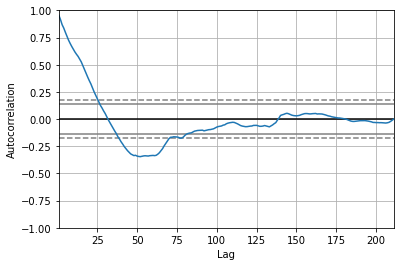

In [9]:
autocorrelation_plot(data["Close"])
plt.show()

Text(0.5, 1.0, 'BTC Autocorrelation plot')

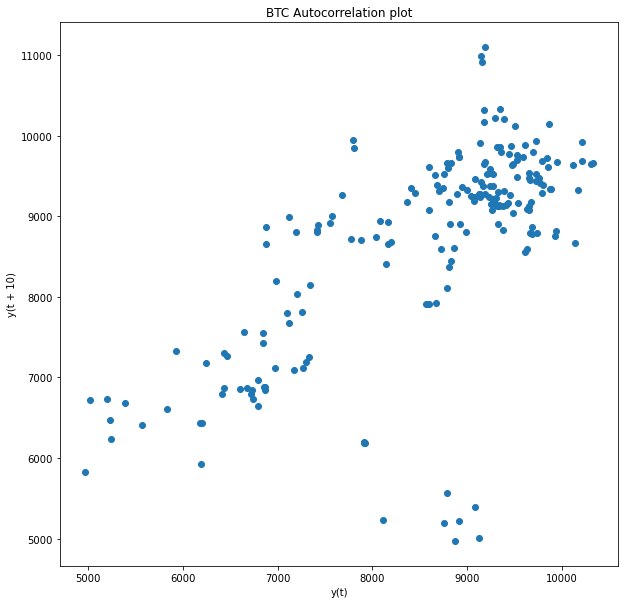

In [10]:
plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=10)
plt.title('BTC Autocorrelation plot')

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  210
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1514.860
Method:                       css-mle   S.D. of innovations            328.388
Date:                Fri, 31 Jul 2020   AIC                           3053.721
Time:                        00:27:13   BIC                           3093.886
Sample:                             1   HQIC                          3069.958
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9667     21.249      0.846      0.398     -23.681      59.615
ar.L1.D.y     -0.0926      0.069     -1.344      0.179      -0.228       0.042
ar.L2.D.y      0.0801      0.069      1.158      0.2

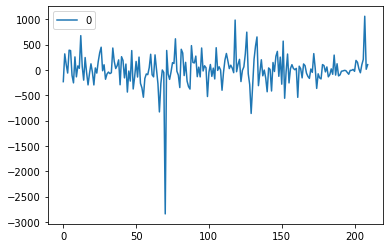

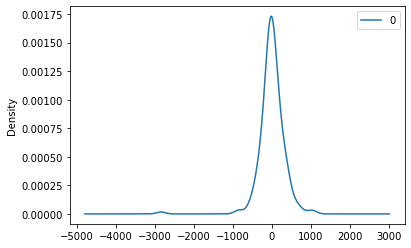

                 0
count   210.000000
mean      0.186710
std     329.259412
min   -2841.326045
25%    -128.390149
50%      -9.630907
75%     140.742028
max    1057.348546


In [11]:
model = ARIMA(data["Close"].values, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [12]:
df = pd.DataFrame(data, columns=["Close", "Volume"])
df = df.reset_index()
train = df[df["Date"] < "2020-07-01"]
test = df[df["Date"] >= "2020-07-01"]

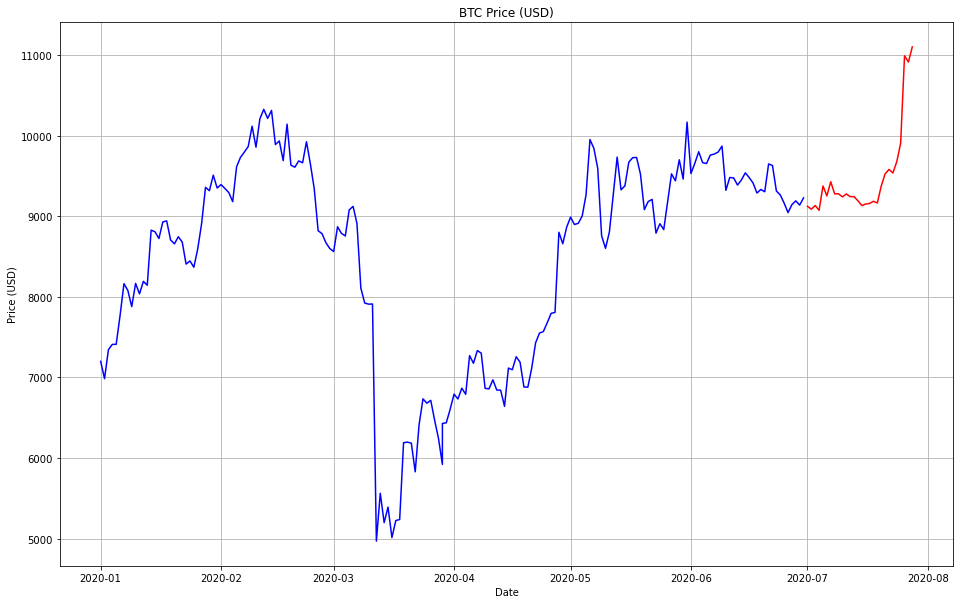

In [13]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(train['Date'], train['Close'], 'blue', label = 'Train data')
plt.plot(test['Date'], test['Close'], 'red', label = 'Test data')
plt.title('BTC Price (USD)')
plt.show()

In [14]:
train_val = train['Close'].values
test_val = test['Close'].values

In [15]:
model = ARIMA(train_val, order=(10,1,0))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(len(test_val))
error = mean_squared_error(test_val, predictions[0])
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 252630.801


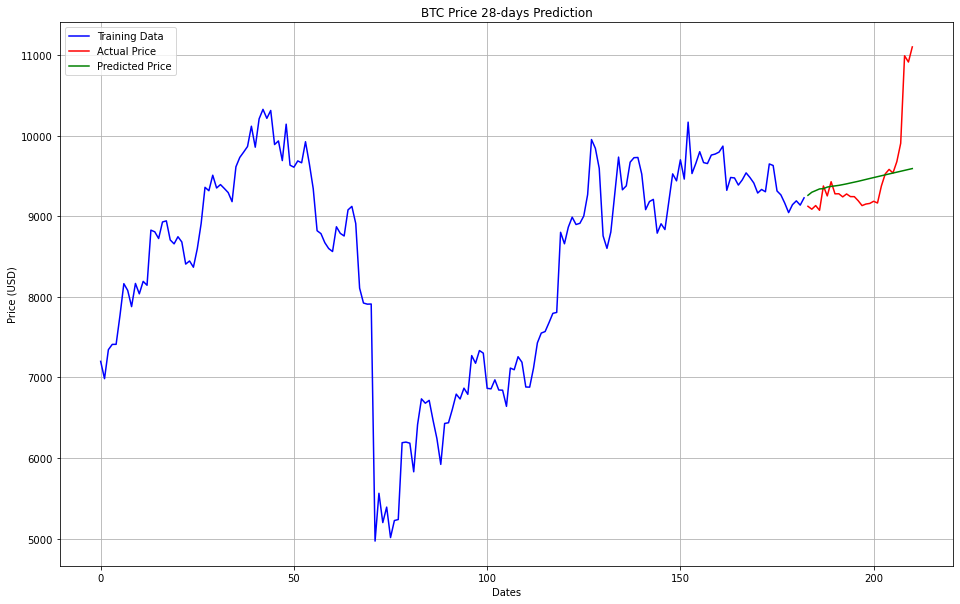

In [16]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['Close'], color='blue', label='Training Data')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.plot(test.index, predictions[0], color='green', label='Predicted Price')
plt.title('BTC Price 28-days Prediction')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [17]:
history = [x for x in train_val]
predictions = []
for t in range(len(test_val)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_val[t]
    history.append(obs)
error = mean_squared_error(test_val, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 52214.728


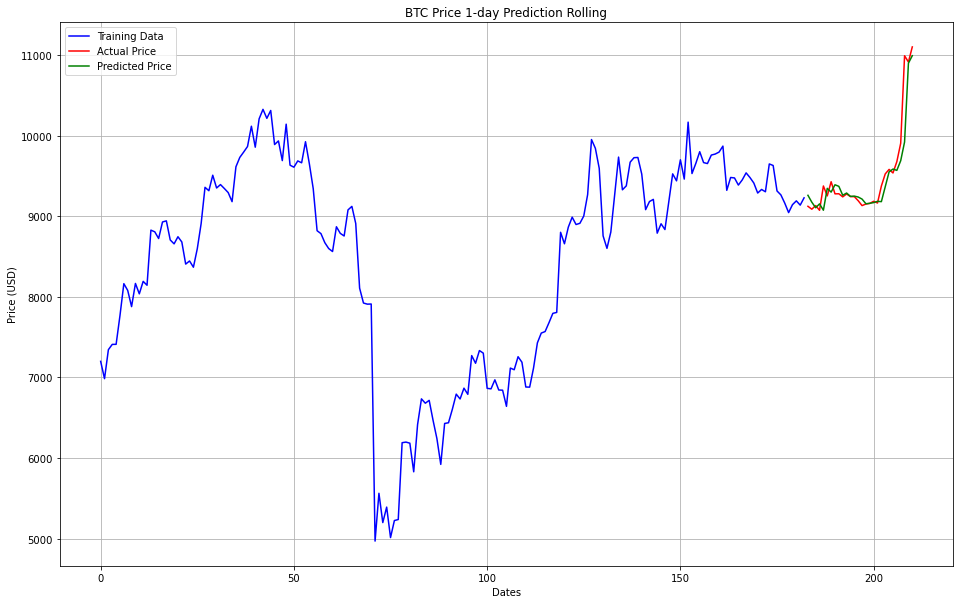

In [18]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['Close'], color='blue', label='Training Data')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.plot(test.index, predictions, color='green', label='Predicted Price')
plt.title('BTC Price 1-day Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()

In [19]:
print(len(test_val))

28


In [20]:
history = [x for x in train_val]
predictions = []
for t in range(4):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(7)
    yhats = output[0]
    predictions.extend(yhats)
    history.extend(test_val[t * 7 : (t + 1) * 7])
error = mean_squared_error(test_val, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 229999.606


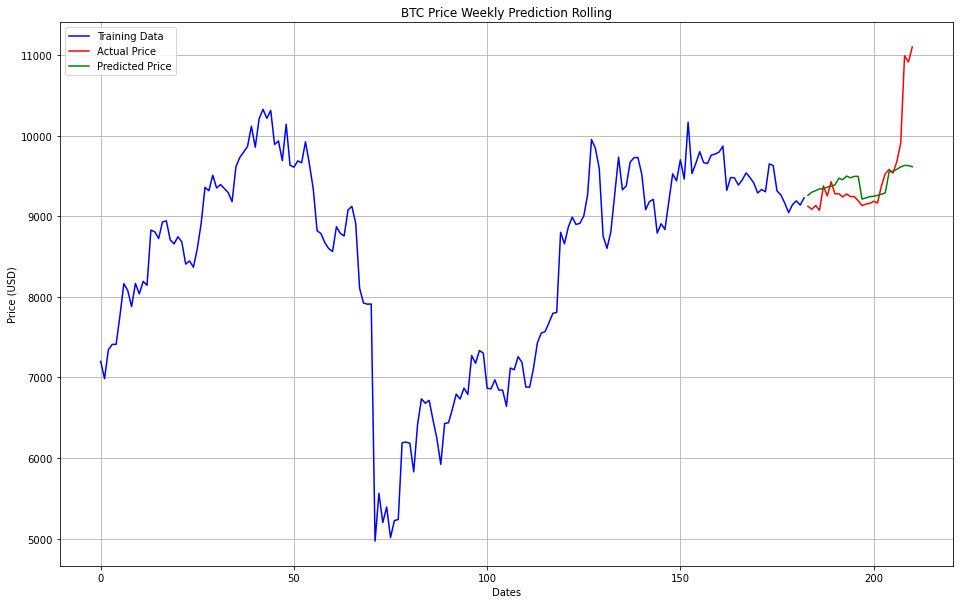

In [21]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(train.index, train['Close'], color='blue', label='Training Data')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.plot(test.index, predictions, color='green', label='Predicted Price')
plt.title('BTC Price Weekly Prediction Rolling')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.legend()